<p style="font-size:36px;text-align:center"> <b>Car Price Predictor</b> </p>

In [152]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


-------

### DATA Overview ::

In [2]:
car=pd.read_csv('quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
print("Shape :",car.shape)
car.info()

Shape : (892, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car.nunique()

name          525
company        48
year           61
Price         274
kms_driven    258
fuel_type       3
dtype: int64

In [7]:
car.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car.Price.unique()[:10]

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000'],
      dtype=object)

In [9]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [10]:
car.duplicated().sum()

94

###### Findings:-
- year and price to be converted to integer
- kms to be converted to int and we have some nan values
- fuel type too have some nan values
- name column has a lot of inconsistent and we need to convet them into categorical data...we will keep 1st 3 words

---------

### DATA Cleaning ::

In [18]:
print(car.columns)
print(car.shape)

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')
(892, 6)


In [24]:
# Fixing the year Column

car[car.year.str.isalpha()]

,name,company,year,Price,kms_driven,fuel_type
206,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
360,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
385,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN
401,URJE,URJENT,SELL,"1,80,000",NaN,NaN
414,Swift Dzire Tour 27 Dec 2016 Regis,Swift,tion,"3,70,000",NaN,NaN
432,Tata zest x,Tata,odel,"3,20,000",NaN,NaN
441,Used Commercial Maruti Omn,Used,arry,"1,50,000",NaN,NaN
560,Hyun,Hyundai,Eon,Ask For Price,NaN,NaN
599,Commercial Car Ta,Commercial,Zest,"3,71,500",NaN,NaN
608,tata Indica,tata,sale,"1,30,000",NaN,NaN


In [35]:
# Checking for the above missing data
print(car[car.name=='Hyunda'])
print(car[car.name=='MARUTI SUZUKI ERTIGA F'])

Empty DataFrame
Columns: [name, company, year, Price, kms_driven, fuel_type]
Index: []
                           name company  year          Price  kms_driven  \
2    Maruti Suzuki Alto 800 Vxi  Maruti  2018  Ask For Price  22,000 kms   
22   Maruti Suzuki Alto 800 Vxi  Maruti  2015         75,000  39,000 kms   
130  Maruti Suzuki Alto 800 Vxi  Maruti  2015       2,20,000  38,000 kms   
428  Maruti Suzuki Alto 800 Vxi  Maruti  2015       2,30,000   5,000 kms   

    fuel_type  
2      Petrol  
22     Petrol  
130    Petrol  
428    Petrol  


In [31]:
# Dropping the rows which doesn't contain the year as they were not repeating much

car= car[car['year'].str.isnumeric()]
car['year']=car['year'].astype('int')

In [37]:
# 2 fixing the price column
car=car[car['Price']!='Ask For Price']

In [39]:
car['Price'].str.replace(',','').astype(int)

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [40]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [41]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [42]:
# 3. fixing kms driven

car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [43]:
car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [44]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [45]:
car['kms_driven'].unique()

array(['45000', '40', '28000', '36000', '41000', '25000', '24530',
       '60000', '30000', '32000', '48660', '4000', '16934', '43000',
       '35550', '39522', '39000', '55000', '72000', '15975', '70000',
       '23452', '35522', '48508', '15487', '82000', '20000', '68000',
       '38000', '27000', '33000', '46000', '16000', '47000', '35000',
       '30874', '15000', '29685', '130000', '19000', '54000', '13000',
       '38200', '22000', '50000', '13500', '3600', '45863', '60500',
       '12500', '18000', '13349', '29000', '44000', '42000', '14000',
       '49000', '36200', '51000', '104000', '33333', '33600', '5600',
       '7500', '26000', '24330', '65480', '200000', '59000', '99000',
       '2800', '21000', '11000', '66000', '3000', '7000', '38500',
       '37200', '43200', '24800', '45872', '40000', '11400', '97200',
       '52000', '31000', '175430', '37000', '65000', '3350', '75000',
       '62000', '73000', '2200', '54870', '34580', '97000', '60', '80200',
       '3200', '0000',

In [46]:
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [47]:
# 4. fixing fuel type
car['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [49]:
car[car['fuel_type']=='LPG']

,name,company,year,Price,kms_driven,fuel_type
482,Maruti Suzuki Eeco 7 STR,Maruti,2013,290000,70000,LPG
621,Maruti Suzuki Omni LPG BS IV,Maruti,2012,120000,160000,LPG


In [52]:
car['fuel_type'].isnull().sum()

1

In [53]:
car['fuel_type'].dropna()

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 816, dtype: object

In [54]:
car=car.dropna()

In [55]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [56]:
# Fixing the name column

car['name'].str.split(' ').str.slice(0,3).str.join(' ') # picking the first 3 words

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [57]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [58]:
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


------------------------------

### EDA ::

In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


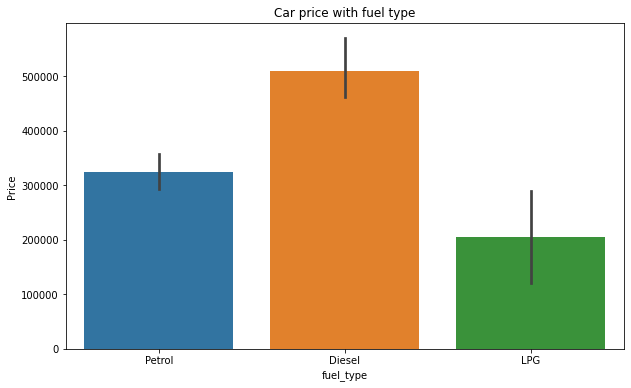

In [74]:
plt.figure(figsize=(10,6))
sns.barplot('fuel_type','Price',data=car)
plt.title("Car price with fuel type")
plt.show()

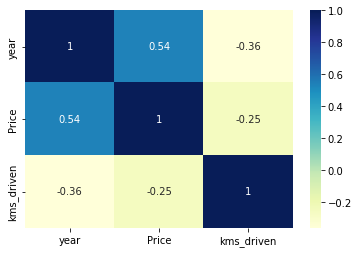

In [78]:
cor=car.corr('spearman')
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

In [79]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [84]:
top_companies=round(car.groupby('company')['Price'].mean().sort_values(ascending=False),2)
top_companies 

company
Jaguar        2495000.00
Land          2100000.00
Mini          1891111.00
Volvo         1850000.00
Audi          1476909.09
Mitsubishi    1298333.33
Mercedes      1170666.83
BMW           1049875.00
Jeep           950000.00
Mahindra       603436.69
Force          572500.00
Toyota         524444.28
Ford           479799.90
Nissan         460666.33
Renault        460512.27
Volkswagen     407105.00
Honda          347632.92
Hyundai        318402.78
Hindustan      303333.33
Maruti         269837.55
Datsun         255714.00
Skoda          251191.38
Chevrolet      202085.26
Tata           200939.29
Fiat           109875.00
Name: Price, dtype: float64

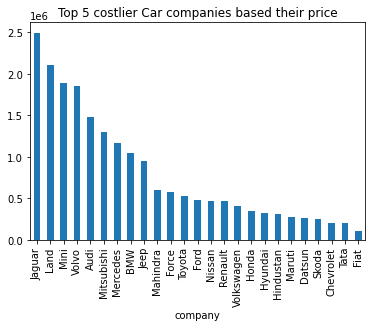

In [86]:
top_companies.plot(kind="bar")
plt.title("Top 5 costlier Car companies based their price")
plt.show()

<AxesSubplot:xlabel='Price'>

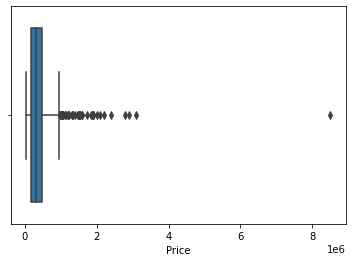

In [87]:
# Checking for outlier

sns.boxplot('Price',data=car)

In [88]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [90]:
car[car['Price']> 5e6] 

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [93]:
car[car['Price']> 4e6] 

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [94]:
# Outlier detected- dropping the outlier

car=car[car['Price']< 6e6].reset_index(drop='True')

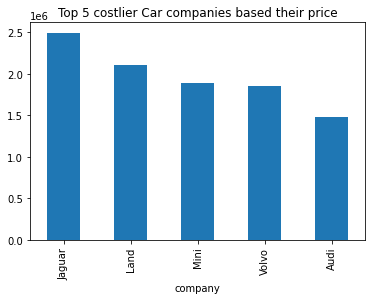

In [108]:
top_companies=round(car.groupby('company')['Price'].mean().sort_values(ascending=False),2)[:5]
top_companies.plot(kind="bar")
plt.title("Top 5 costlier Car companies based their price")
plt.show()

<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

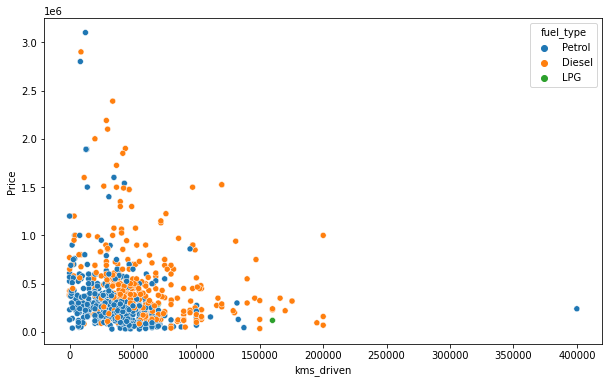

In [142]:
plt.figure(figsize=(10,6))
sns.scatterplot('kms_driven','Price',data=car,hue='fuel_type')

<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

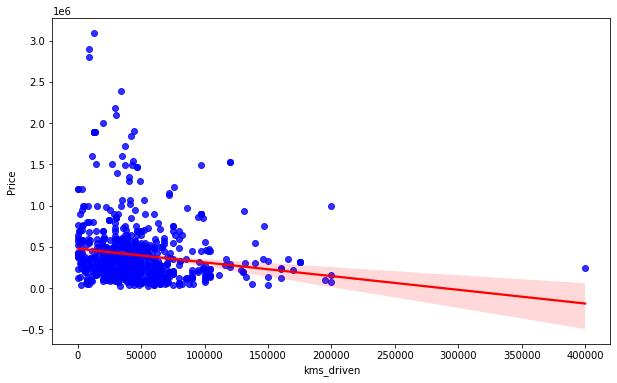

In [146]:
plt.figure(figsize=(10,6))
sns.regplot('kms_driven','Price',data=car,scatter_kws={"color":"blue"}, line_kws={"color":"red"})

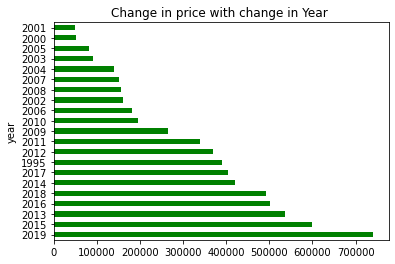

In [140]:
price_with_year=round(car.groupby('year')['Price'].mean().sort_values(ascending=False),2)
price_with_year.plot(kind="barh",color='green')
plt.title("Change in price with change in Year ")
plt.show()

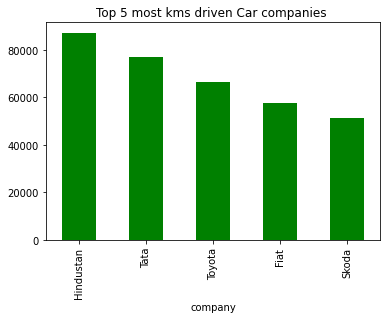

In [124]:
top_driven=round(car.groupby('company')['kms_driven'].mean().sort_values(ascending=False),2)[:5]
top_driven.plot(kind="bar",color='green')
plt.title("Top 5 most kms driven Car companies ")
plt.show()

###### Findings:-
- Diesel cars are costlier than petrol & LPG
- Jaguar, Land, Mini, Volvo, Audi are the costlier cars
- Chevrolet, Tata, Fiat are the affordable/Cheaper and mostly driven around
- From the regplot we can clearly see that as the kms_driven increases the price decreases
- Also there is a small relative change in price as the year changes

------------------------------------

### MODEL BUILDING ::

In [206]:
x=car.drop(columns='Price')
y=car['Price']

In [207]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2)

In [208]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [209]:
column_trans1= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
             remainder='passthrough')

#### Linear regression

In [210]:
LR=LinearRegression()
pipe=make_pipeline(column_trans1,LR)
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [212]:
predict=pipe.predict(xtest)
print( "R2 Score :",round( r2_score(ytest,predict) *100,2))

R2 Score : 67.18


In [216]:
scores=[]

for i in range(1000):
    xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LinearRegression()
    pipe=make_pipeline(column_trans1,LR)
    pipe.fit(xtrain,ytrain)
    predict=pipe.predict(xtest)
    scores.append(round(r2_score(ytest,predict)*100,2))

In [218]:
print("Index location of max score",np.argmax(scores) )
print("Optimized R2 Score:- ",round(scores[np.argmax(scores)],2))

Index location of max score 661
Optimized R2 Score:-  89.0


In [223]:
# training the model on optimized score
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
LR=LinearRegression()
pipe=make_pipeline(column_trans1,LR)
pipe.fit(xtrain,ytrain)
predict=pipe.predict(xtest)
r2_score(ytest,predict)

0.8900436342356015

In [220]:
  pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([416301.30776653])